# Identify the most significant risk factors in the dataset that contribute to strokes.

In [19]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
sb.set()

In [2]:
strokedata = pd.read_csv('stroke.csv')

In [3]:
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [23]:
num = strokedata.select_dtypes(include=['float64', 'int64'])
num = num.drop(['stroke','id'],axis=1)
cat = strokedata.select_dtypes(include=['object'])
stroke = strokedata['stroke']

In [5]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                4909 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 199.7 KB


In [6]:
stroke.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5110 entries, 0 to 5109
Series name: stroke
Non-Null Count  Dtype
--------------  -----
5110 non-null   int64
dtypes: int64(1)
memory usage: 40.1 KB


# Relationship between stroke and Numeric variables

<Axes: >

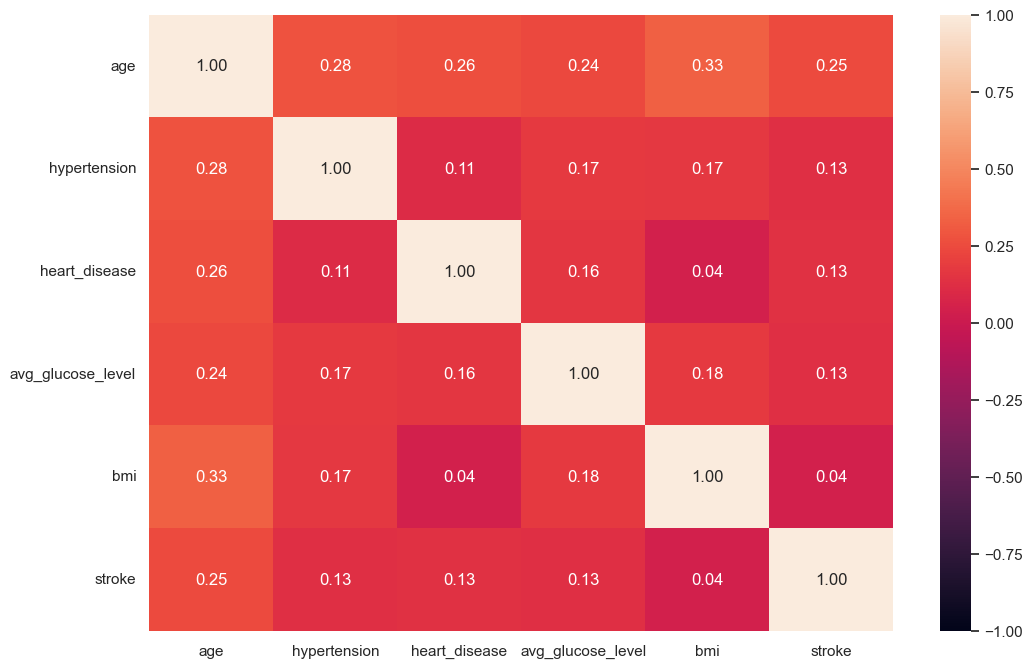

In [8]:
X= stroke
y= num
trainDF = pd.concat([y, X], axis = 1).reindex(y.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [66]:
num['stroke'] = strokedata['stroke']
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                4909 non-null   float64
 5   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


C:\Users\Qiu Ming\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


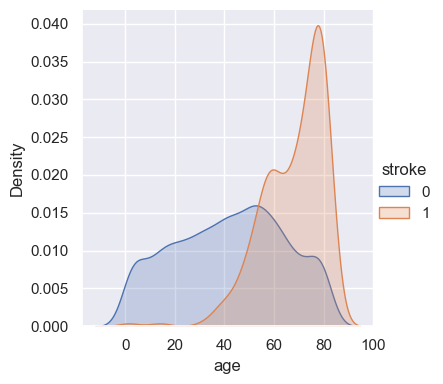

In [67]:
sb.FacetGrid(num, hue = "stroke", height = 4,).map(sb.kdeplot, "age", fill = True).add_legend();

C:\Users\Qiu Ming\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


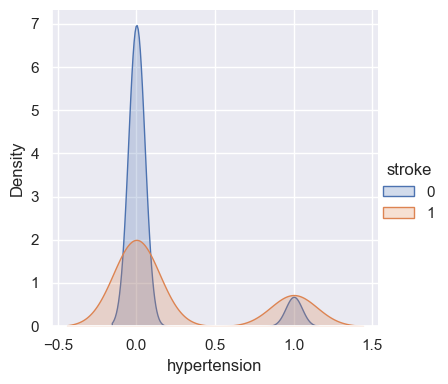

In [68]:
sb.FacetGrid(num, hue = "stroke", height = 4,).map(sb.kdeplot, "hypertension", fill = True).add_legend();

C:\Users\Qiu Ming\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


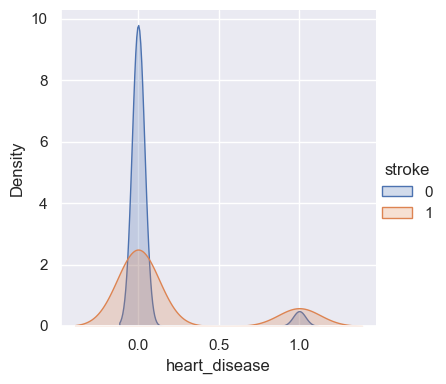

In [69]:
sb.FacetGrid(num, hue = "stroke", height = 4,).map(sb.kdeplot, "heart_disease", fill = True).add_legend();

C:\Users\Qiu Ming\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


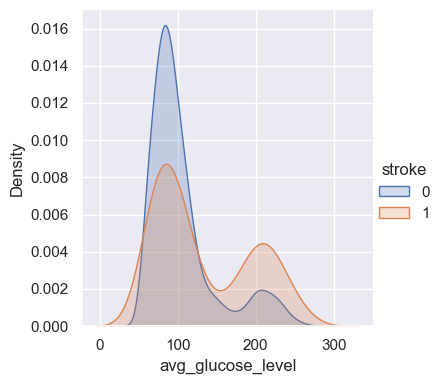

In [70]:
sb.FacetGrid(num, hue = "stroke", height = 4,).map(sb.kdeplot, "avg_glucose_level", fill = True).add_legend();

# Relationship between stroke and categorical variables# 

In [33]:
gender = pd.DataFrame(strokedata[["gender"]])

for i in gender:
    others = gender[(gender[i] == "Other")]
    gender_data = gender.drop(others.index)

label = LabelEncoder()
gender_data["gender"] = label.fit_transform(gender_data["gender"].astype("str"))
gender_data.value_counts()

gender
0         2994
1         2115
Name: count, dtype: int64

     1: Male  0: Female

In [37]:
ever_data = pd.DataFrame(strokedata[["ever_married"]])

label = LabelEncoder()
ever_data["ever_married"] = label.fit_transform(ever_data["ever_married"].astype("str"))
ever_data.value_counts()

ever_married
1               3353
0               1757
Name: count, dtype: int64

     1: Yes  0: No

In [46]:
work = pd.DataFrame(strokedata[["work_type"]])

for i in work:
    children = work[(work[i] == "children")]    #Children removed as they fall under age section
    never = work[(work[i] == "Never_worked")]   #Never_worked removed as dataset is too small
    work1 = work.drop(children.index)
    work_data = work1.drop(never.index)

label = LabelEncoder()
work_data["work_type"] = label.fit_transform(work_data["work_type"].astype("str"))
work_data.value_counts()

work_type
1            2925
2             819
0             657
Name: count, dtype: int64

    2: Private 1: Self-employed 0: Govt_job
    


In [44]:
residence_data = pd.DataFrame(strokedata[["Residence_type"]])

residence_data["Residence_type"] = label.fit_transform(residence_data["Residence_type"].astype("str"))

residence_data.value_counts()

Residence_type
1                 2596
0                 2514
Name: count, dtype: int64

    1: Urban  0: Rural 

In [49]:
smoke = pd.DataFrame(strokedata[["smoking_status"]])
smoke.value_counts()

smoking_status 
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [53]:
smoke = pd.DataFrame(strokedata[["smoking_status"]])

for i in smoke:
    unknown = smoke[(smoke[i] == "Unknown")] #unknown variables does not contribute to prediction of stroke.
    smoke_data = smoke.drop(unknown.index)

label = LabelEncoder()
smoke_data["smoking_status"] = label.fit_transform(smoke_data["smoking_status"].astype("str"))
smoke_data.value_counts()

smoking_status
1                 1892
0                  885
2                  789
Name: count, dtype: int64

    2: smokes 1: never smoked 0: formerly smoked

In [54]:
cat['gender'] = gender_data
cat['ever_married'] = ever_data
cat['work_type'] = work_data
cat['Residence_type'] = residence_data
cat['smoking_status'] = smoke_data
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5109 non-null   float64
 1   ever_married    5110 non-null   int32  
 2   work_type       4401 non-null   float64
 3   Residence_type  5110 non-null   int32  
 4   smoking_status  3566 non-null   float64
dtypes: float64(3), int32(2)
memory usage: 159.8 KB


<Axes: >

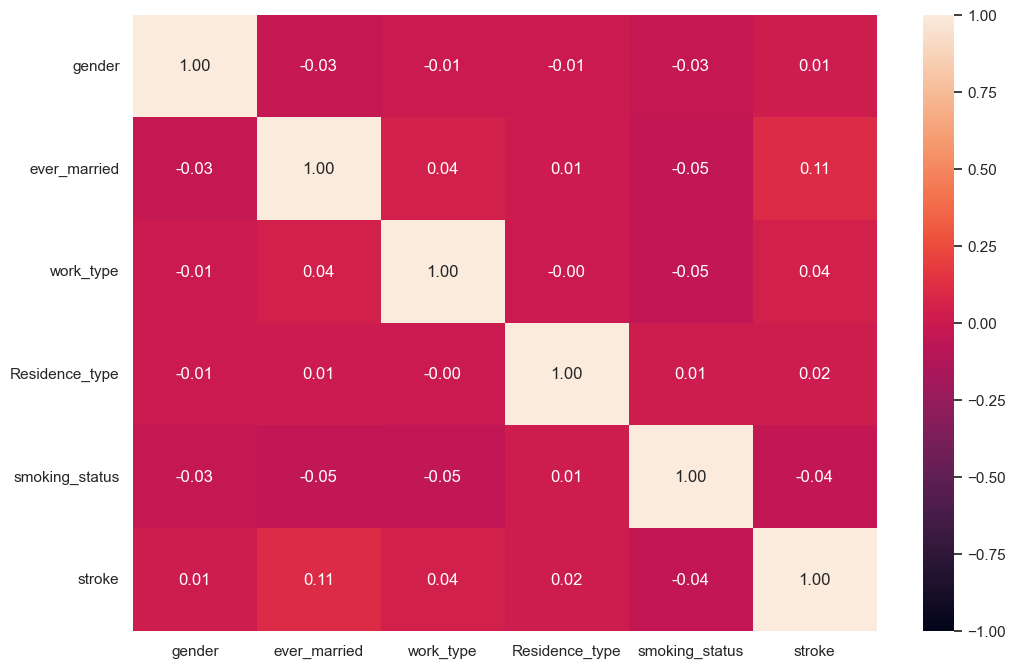

In [55]:
X= stroke
y= cat
trainDF = pd.concat([y, X], axis = 1).reindex(y.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [63]:
cat['stroke'] = strokedata['stroke']
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5109 non-null   float64
 1   ever_married    5110 non-null   int32  
 2   work_type       4401 non-null   float64
 3   Residence_type  5110 non-null   int32  
 4   smoking_status  3566 non-null   float64
 5   new_column      5110 non-null   int64  
 6   stroke          5110 non-null   int64  
dtypes: float64(3), int32(2), int64(2)
memory usage: 239.7 KB


C:\Users\Qiu Ming\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


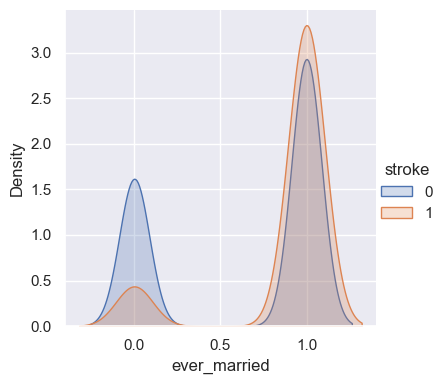

In [65]:
sb.FacetGrid(cat, hue = "stroke", height = 4,).map(sb.kdeplot, "ever_married", fill = True).add_legend();

     1: Yes  0: No